In [43]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All"
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


#For loading the MNIST dataset from Keras
#from tensorflow.keras.datasets import mnist

In [45]:
import pandas as pd
import numpy as np

# Load the train and test datasets from CSV
train = pd.read_csv('/content/train.csv')  # Train data should be loaded here
test = pd.read_csv('/content/test.csv')  # Test data should be loaded here

# Inspect the column names to identify the correct column
print(train.columns)

# If the column is named 'label', this will work:
# Separate features (images) and labels (digits) in the train set
X_train = train.drop(columns=['label']).values  # Drop the 'label' column to get the features
y_train = train['label'].values  # The 'label' column contains the digits (0-9)

# Reshape the image data to the format (num_samples, 28, 28)
X_train = X_train.reshape(-1, 28, 28)

# Similarly, handle the test set (without labels)
X_test = test.values  # No labels in the test set
X_test = X_test.reshape(-1, 28, 28)

# Print the shapes to verify
print(f'Training data shape: {X_train.shape}')  # Expected: (num_samples, 28, 28)
print(f'Test data shape: {X_test.shape}')  # Expected: (num_samples, 28, 28)


Index(['label', 'pixel0', 'pixel1', 'pixel2', 'pixel3', 'pixel4', 'pixel5',
       'pixel6', 'pixel7', 'pixel8',
       ...
       'pixel774', 'pixel775', 'pixel776', 'pixel777', 'pixel778', 'pixel779',
       'pixel780', 'pixel781', 'pixel782', 'pixel783'],
      dtype='object', length=785)
Training data shape: (42000, 28, 28)
Test data shape: (28000, 28, 28)


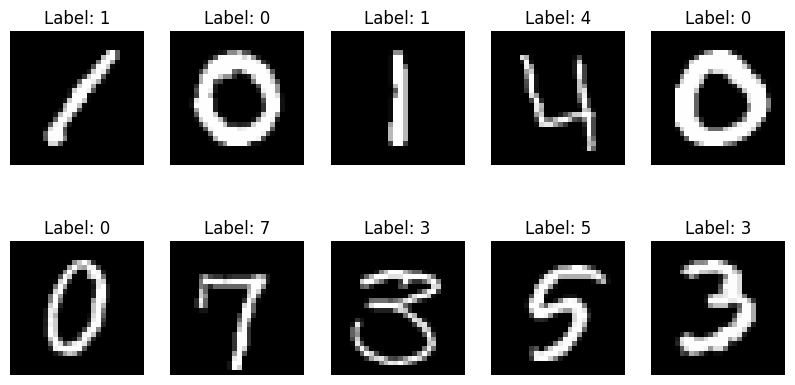

In [46]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap='gray')
    plt.title(f"Label: {y_train[i]}")
    plt.axis('off')
plt.show()

In [47]:
X_train_flat = X_train.reshape(X_train.shape[0], -1) / 255.0
X_test_flat = X_test.reshape(X_test.shape[0], -1) / 255.0

print(f'Flattened training data shape: {X_train_flat.shape}')
print(f'Flattened test data shape: {X_test_flat.shape}')

Flattened training data shape: (42000, 784)
Flattened test data shape: (28000, 784)


In [48]:
X_train_split, X_val, y_train_split, y_val = train_test_split(X_train_flat, y_train, test_size=0.2, random_state=42)

print(f'Training set shape: {X_train_split.shape}')
print(f'Validation set shape: {X_val.shape}')

Training set shape: (33600, 784)
Validation set shape: (8400, 784)


KNN Validation Accuracy: 0.9667
              precision    recall  f1-score   support

           0       0.98      1.00      0.99       816
           1       0.95      1.00      0.97       909
           2       0.98      0.95      0.96       846
           3       0.97      0.96      0.96       937
           4       0.98      0.97      0.98       839
           5       0.95      0.97      0.96       702
           6       0.97      0.99      0.98       785
           7       0.96      0.97      0.96       893
           8       0.98      0.93      0.95       835
           9       0.95      0.95      0.95       838

    accuracy                           0.97      8400
   macro avg       0.97      0.97      0.97      8400
weighted avg       0.97      0.97      0.97      8400



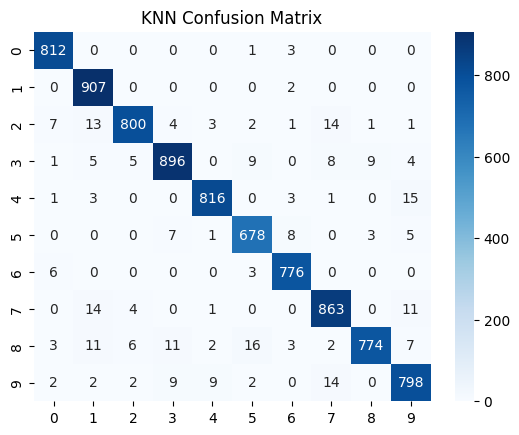

In [49]:
knn_model = KNeighborsClassifier(n_neighbors=3)
knn_model.fit(X_train_split, y_train_split)

y_val_pred_knn = knn_model.predict(X_val)

knn_acc = accuracy_score(y_val, y_val_pred_knn)
print(f'KNN Validation Accuracy: {knn_acc:.4f}')

print(classification_report(y_val, y_val_pred_knn))
sns.heatmap(confusion_matrix(y_val, y_val_pred_knn), annot=True, fmt='d', cmap='Blues')
plt.title("KNN Confusion Matrix")
plt.show()

In [50]:
from tensorflow.keras.utils import to_categorical  # One-hot encode

X = train.drop('label', axis=1).to_numpy()
y = train['label'].to_numpy()

# Normalize the pixel values  [0, 255] -> [0, 1]
X = X / 255.0

X = X.reshape(-1, 28, 28, 1)

y = to_categorical(y, 10)
y

array([[0., 1., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.]])

In [51]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

In [52]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Input

model = Sequential([
    Input(shape=(28, 28, 1)),  # Use Input layer to specify the input shape
    Flatten(),                 # Flatten the input
    Dense(128, activation='relu'),  # Hidden layer with 128 neurons
    Dense(10, activation='softmax')  # Output layer with 10 neurons
])

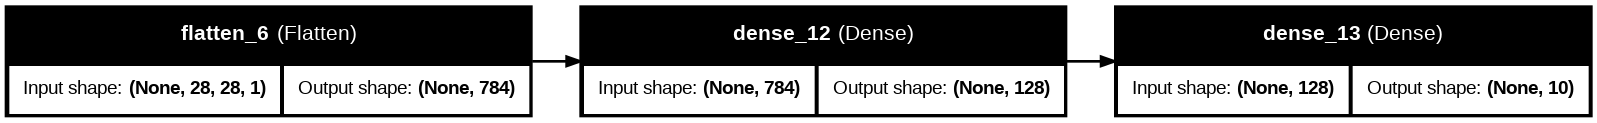

In [53]:
from tensorflow.keras.utils import plot_model

plot_model(model, show_shapes=True, show_layer_names=True, dpi=96, rankdir='LR')

In [54]:
train.isnull().sum()

,0
label,0
pixel0,0
pixel1,0
pixel2,0
pixel3,0
...,...
pixel779,0
pixel780,0
pixel781,0
pixel782,0


In [55]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [56]:
history = model.fit(X_train, y_train,
                    validation_data=(X_val, y_val),
                    epochs=10,
                    batch_size=32)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.8484 - loss: 0.5430 - val_accuracy: 0.9423 - val_loss: 0.1948
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9549 - loss: 0.1584 - val_accuracy: 0.9606 - val_loss: 0.1376
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9716 - loss: 0.1021 - val_accuracy: 0.9625 - val_loss: 0.1215
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9774 - loss: 0.0768 - val_accuracy: 0.9694 - val_loss: 0.1016
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9821 - loss: 0.0587 - val_accuracy: 0.9699 - val_loss: 0.0997
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.9862 - loss: 0.0437 - val_accuracy: 0.9707 - val_loss: 0.1038
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9910 - loss: 0.0345 - val_accuracy: 0.9712 - val_loss: 0.0925
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9921 - loss: 0.0275 - 

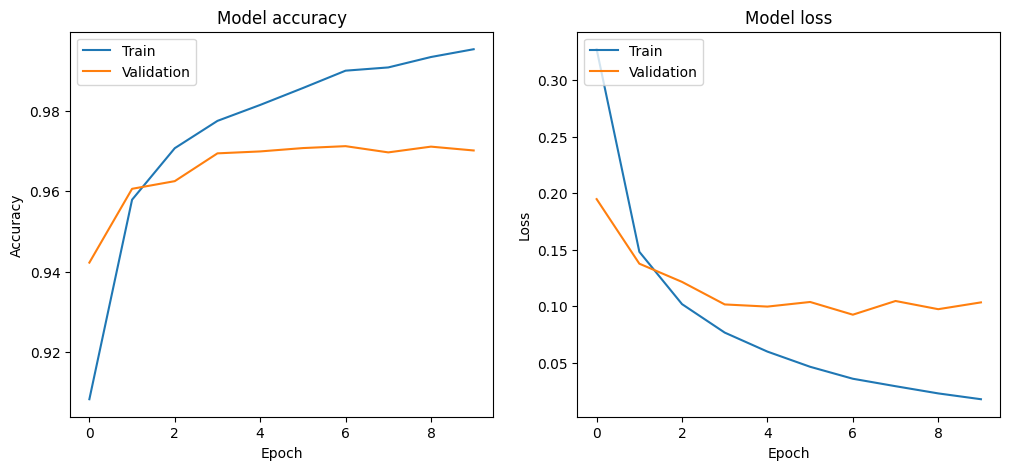

In [57]:
def history_plot(history, model_name='Model'):
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title(f'{model_name} accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left')

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title(f'{model_name} loss')
    plt.ylabel('Loss')
    plt.xlabel('Epoch')
    plt.legend(['Train', 'Validation'], loc='upper left');

history_plot(history)

In [58]:
from tensorflow.keras.layers import Dropout

# Define a deeper model
model_deep = Sequential([
    Input(shape=(28, 28, 1)),  # Input layer with the specified shape
    Flatten(),                  # Flatten the input
    Dense(256, activation='relu'),      # First hidden layer with 256 neurons
    Dense(128, activation='relu'),      # Second hidden layer with 128 neurons
    Dense(64, activation='relu'),       # Third hidden layer with 64 neurons
    Dense(10, activation='softmax')     # Output layer with 10 neurons
])

model_deep.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])

history_deep = model_deep.fit(X_train, y_train,
                               validation_data=(X_val, y_val),
                               epochs=10,
                               batch_size=32)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.8603 - loss: 0.4678 - val_accuracy: 0.9473 - val_loss: 0.1714
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9685 - loss: 0.1037 - val_accuracy: 0.9611 - val_loss: 0.1227
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 9s 4ms/step - accuracy: 0.9778 - loss: 0.0701 - val_accuracy: 0.9669 - val_loss: 0.1080
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step - accuracy: 0.9821 - loss: 0.0553 - val_accuracy: 0.9700 - val_loss: 0.0995
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9873 - loss: 0.0390 - val_accuracy: 0.9729 - val_loss: 0.1013
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9872 - loss: 0.0391 - val_accuracy: 0.9713 - val_loss: 0.1147
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9923 - loss: 0.0232 - val_accuracy: 0.9727 - val_loss: 0.1071
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.9925 - loss: 0.0207 - 

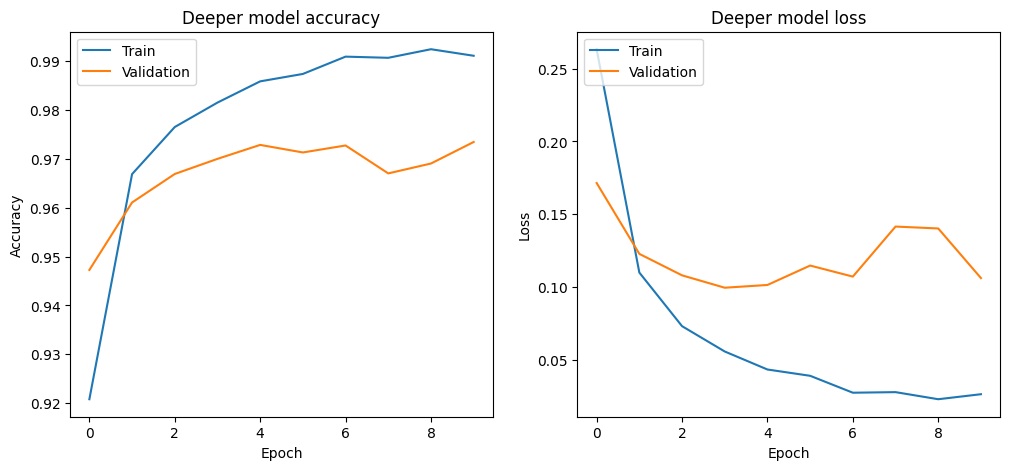

In [59]:
history_plot(history_deep, model_name='Deeper model')

In [60]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D

# Define a model with convolutional layers
model_conv = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),  # First convolutional layer
    MaxPooling2D(pool_size=(2, 2)),                                             # Max pooling layer
    Conv2D(64, kernel_size=(3, 3), activation='relu'),                          # Second convolutional layer
    MaxPooling2D(pool_size=(2, 2)),                                             # Max pooling layer
    Flatten(),                                                                 # Flatten the output
    Dense(128, activation='relu'),                                              # Fully connected layer
    Dense(10, activation='softmax')                                              # Output layer
])


model_conv.compile(optimizer='adam',
                   loss='categorical_crossentropy',
                   metrics=['accuracy'])


history_conv = model_conv.fit(X_train, y_train,
                              validation_data=(X_val, y_val),
                              epochs=10,
                              batch_size=32)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


1050/1050 ━━━━━━━━━━━━━━━━━━━━ 49s 22ms/step - accuracy: 0.8779 - loss: 0.3945 - val_accuracy: 0.9757 - val_loss: 0.0767
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 0.9833 - loss: 0.0546 - val_accuracy: 0.9802 - val_loss: 0.0619
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 22ms/step - accuracy: 0.9872 - loss: 0.0391 - val_accuracy: 0.9873 - val_loss: 0.0361
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 23s 22ms/step - accuracy: 0.9917 - loss: 0.0259 - val_accuracy: 0.9880 - val_loss: 0.0384
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9941 - loss: 0.0186 - val_accuracy: 0.9861 - val_loss: 0.0438
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9963 - loss: 0.0119 - val_accuracy: 0.9893 - val_loss: 0.0406
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 41s 21ms/step - accuracy: 0.9960 - loss: 0.0125 - val_accuracy: 0.9887 - val_loss: 0.0417
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 19s 19ms/step - accuracy: 0.9973 - loss: 0.00

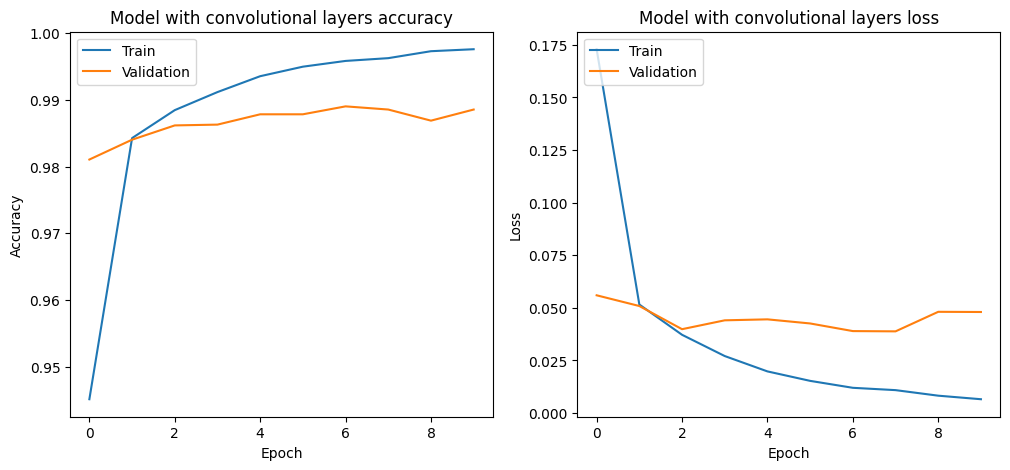

In [20]:
history_plot(history_conv, model_name='Model with convolutional layers')

In [61]:
# Define a model with dropout
model_dropout = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),  # First convolutional layer
    MaxPooling2D(pool_size=(2, 2)),                                             # Max pooling layer
    Dropout(0.25),                                                              # Dropout layer
    Conv2D(64, kernel_size=(3, 3), activation='relu'),                          # Second convolutional layer
    MaxPooling2D(pool_size=(2, 2)),                                             # Max pooling layer
    Dropout(0.25),                                                              # Dropout layer
    Flatten(),                                                                 # Flatten the output
    Dense(128, activation='relu'),                                              # Fully connected layer
    Dropout(0.5),                                                               # Dropout layer
    Dense(10, activation='softmax')                                              # Output layer
])

model_dropout.compile(optimizer='adam',
                      loss='categorical_crossentropy',
                      metrics=['accuracy'])

history_dropout = model_dropout.fit(X_train, y_train,
                                    validation_data=(X_train, y_train),
                                    epochs=10,
                                    batch_size=32)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 37s 33ms/step - accuracy: 0.7827 - loss: 0.6525 - val_accuracy: 0.9773 - val_loss: 0.0723
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 35s 28ms/step - accuracy: 0.9622 - loss: 0.1251 - val_accuracy: 0.9844 - val_loss: 0.0466
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 29s 28ms/step - accuracy: 0.9719 - loss: 0.0923 - val_accuracy: 0.9895 - val_loss: 0.0321
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 28s 26ms/step - accuracy: 0.9761 - loss: 0.0767 - val_accuracy: 0.9918 - val_loss: 0.0266
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 39s 25ms/step - accuracy: 0.9800 - loss: 0.0647 - val_accuracy: 0.9926 - val_loss: 0.0231
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 24ms/step - accuracy: 0.9823 - loss: 0.0581 - val_accuracy: 0.9936 - val_loss: 0.0205
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 26s 24ms/step - accuracy: 0.9858 - loss: 0.0506 - val_accuracy: 0.9942 - val_loss: 0.0178
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 42s 25ms/step - accuracy: 0.9834 -

In [62]:

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Conv2D, MaxPooling2D, Dropout

# Define the model creation function
def build_model(hp):
    model = Sequential([
        Input(shape=(28, 28, 1)),
        Conv2D(filters=hp.Int('conv_1_filters', min_value=32, max_value=128, step=32),
               kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(rate=hp.Float('dropout_1', min_value=0.2, max_value=0.5, step=0.1)),
        Conv2D(filters=hp.Int('conv_2_filters', min_value=64, max_value=256, step=64),
               kernel_size=(3, 3), activation='relu'),
        MaxPooling2D(pool_size=(2, 2)),
        Dropout(rate=hp.Float('dropout_2', min_value=0.2, max_value=0.5, step=0.1)),
        Flatten(),
        Dense(units=hp.Int('dense_units', min_value=128, max_value=512, step=128), activation='relu'),
        Dropout(rate=hp.Float('dropout_3', min_value=0.2, max_value=0.5, step=0.1)),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer=hp.Choice('optimizer', values=['adam', 'rmsprop']),
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [63]:
# Create the tuner
tuner = kt.RandomSearch(
    build_model,
    objective='val_accuracy',
    max_trials=5,
    executions_per_trial=1,
    directory='my_dir',
    project_name='intro_to_kt'
)

tuner.search(X_train, y_train, epochs=10, validation_data=(X_val, y_val))

best_hps = tuner.get_best_hyperparameters(num_trials=1)[0]

best_model = tuner.hypermodel.build(best_hps)

print(f"Best hyperparameters: {best_hps}")

Reloading Tuner from my_dir/intro_to_kt/tuner0.json
Best hyperparameters: <keras_tuner.src.engine.hyperparameters.hyperparameters.HyperParameters object at 0x7bc6c80c8730>


In [64]:
history_best = best_model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=10)

Epoch 1/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 52s 48ms/step - accuracy: 0.8302 - loss: 0.5083 - val_accuracy: 0.9793 - val_loss: 0.0686
Epoch 2/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 48s 45ms/step - accuracy: 0.9696 - loss: 0.0915 - val_accuracy: 0.9874 - val_loss: 0.0435
Epoch 3/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 82s 45ms/step - accuracy: 0.9789 - loss: 0.0669 - val_accuracy: 0.9869 - val_loss: 0.0391
Epoch 4/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 83s 46ms/step - accuracy: 0.9806 - loss: 0.0587 - val_accuracy: 0.9855 - val_loss: 0.0465
Epoch 5/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 48s 46ms/step - accuracy: 0.9846 - loss: 0.0469 - val_accuracy: 0.9910 - val_loss: 0.0286
Epoch 6/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 81s 45ms/step - accuracy: 0.9864 - loss: 0.0405 - val_accuracy: 0.9901 - val_loss: 0.0321
Epoch 7/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 48s 46ms/step - accuracy: 0.9880 - loss: 0.0400 - val_accuracy: 0.9908 - val_loss: 0.0284
Epoch 8/10
1050/1050 ━━━━━━━━━━━━━━━━━━━━ 48s 45ms/step - accuracy: 0.9885 -

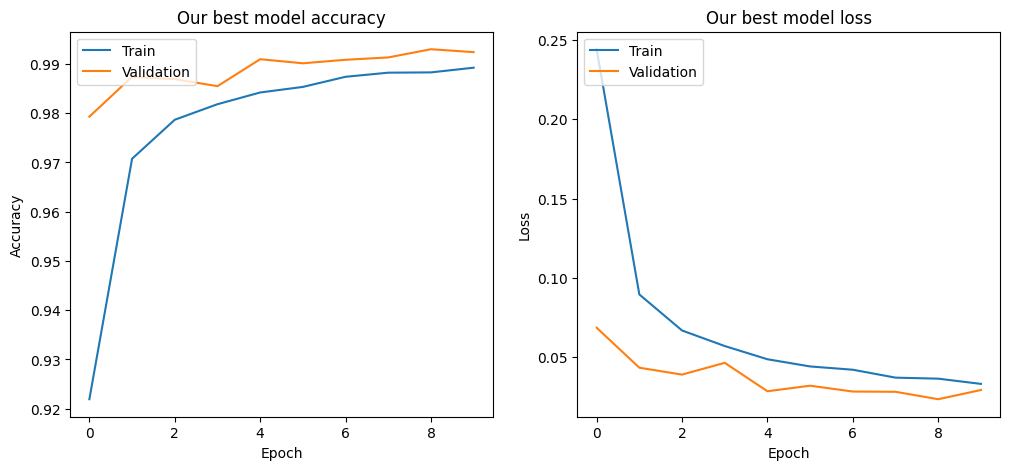

In [65]:
history_plot(history_best, model_name='Our best model')

In [66]:
test_loss, test_accuracy = best_model.evaluate(X_val, y_val, verbose=0)
print(f'Test Loss: {test_loss}')
print(f'Test Accuracy: {test_accuracy}')

Test Loss: 0.0294055063277483
Test Accuracy: 0.9923809766769409


In [68]:
y_val_pred = best_model.predict(X_val)
y_val_pred_classes = np.argmax(y_val_pred, axis=1)
y_val_true_classes = np.argmax(y_val, axis=1)

263/263 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step


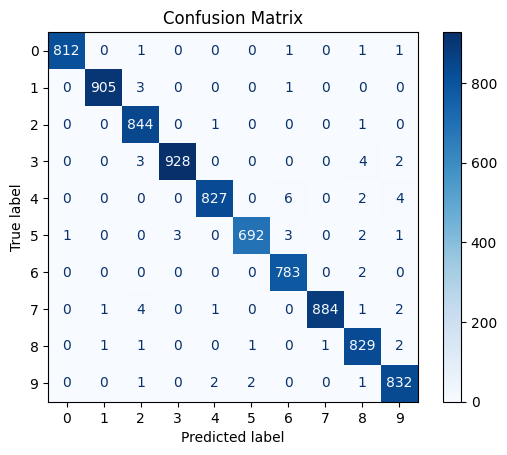

In [69]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_val_true_classes, y_val_pred_classes)

disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[str(i) for i in range(10)])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()